In [1]:
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

# Test Koopman operater in numpy

In [2]:
file_name = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 11]_batch_10'
operater = Koopman_numpy(file_name)
x = np.array([0.5,0.5,3.1])
nonlinear_x = x
u = np.array([0.5,0.3])
lifted_x = operater.encode(x)
for i in range(5):
    next_lifted_x = operater.linear(lifted_x,u)
    nonlinear_x = discrete_nonlinear(nonlinear_x,u,0.1)
next_x = operater.decode(next_lifted_x)
print(next_x,nonlinear_x)
operater.property()

[0.47464384 0.49886924 1.90113632] [[0.25026726 0.49540256 3.25      ]]
The system is uncontrollable, the rank of the controllability matrix is 9.


In [3]:
file_name = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 11]_batch_10'
operater = Koopman_numpy(file_name)
A,B = operater.linear_matrix()
print(np.linalg.matrix_rank(A),B)

11 [[ 2.9490825e-03 -1.2317667e-03]
 [ 2.5670140e-03  1.3604407e-03]
 [-2.5713272e-04  6.3111827e-02]
 [-4.5752741e-04  4.2442123e-05]
 [ 2.4626497e-04 -4.4906460e-04]
 [-6.4773755e-03  5.8773290e-05]
 [ 6.0355845e-03 -6.3706981e-04]
 [ 1.5329677e-03  1.4314391e-02]
 [ 6.9549926e-05 -8.0065550e-03]
 [ 2.0223499e-04 -6.8825524e-04]
 [-1.9645787e-04  1.0431507e-02]]


In [6]:
Ae = np.linalg.eigvals(A)
print(Ae)

[-0.6671216 +0.j          0.05704826+0.j         -0.1561022 +0.12911077j
 -0.1561022 -0.12911077j -0.49422142+0.j         -0.43215787+0.j
 -0.37377557+0.j          0.99992865+0.j          1.0001483 +0.00024431j
  1.0001483 -0.00024431j  1.0004467 +0.j        ]


# Test MPC function

In [1]:
# get augmented matrices
A,B = operater.linear_matrix()
Q = np.diag(np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.]))
R = np.diag(np.array([1.,2.]))
rho = 1.
Gamma,Theta,Qbig,H = get_Augmented_Matrix(A,B,Q,R,rho,3,2)
print(Gamma.shape)
print(Theta.shape)
print(Qbig.shape)
print(H.shape)

NameError: name 'operater' is not defined

In [6]:
#%matplotlib notebook
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

In [7]:
SimLength = 20
init_x = np.array([0.,0.,0.])
path=simulate_path(init_x,SimLength)

./dataset/MPC/SimLenth_20_Ts_0.1


Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]


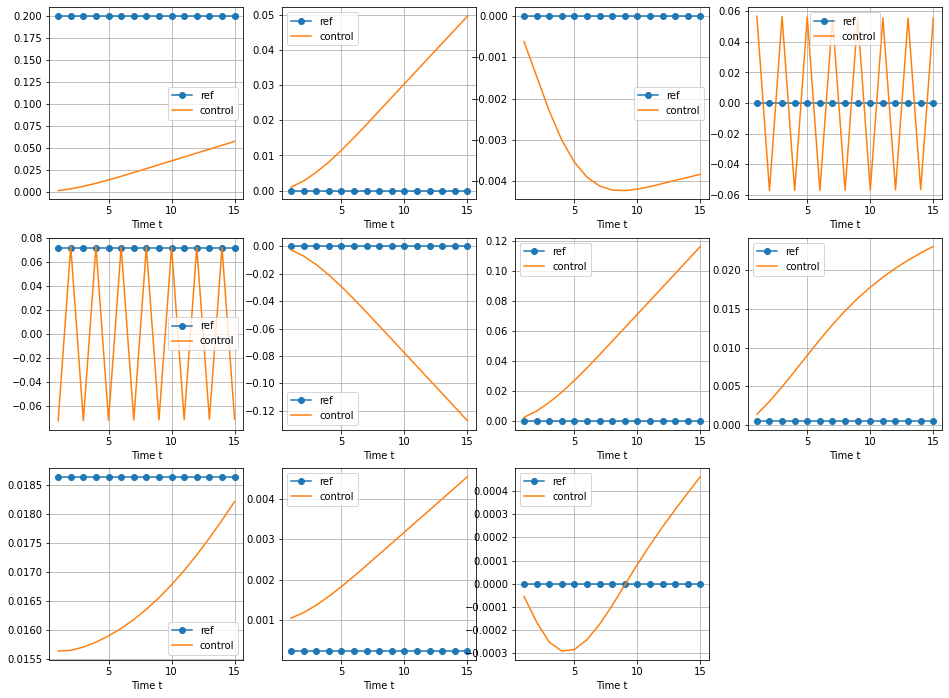

0.00578961772687088 [-0.01818454 -0.01822844 -0.06451644] [ 0.38408475 -0.00812662]
Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
0.003826737003375594 [ 0.06362223 -0.02573268 -0.06504575] [ 0.70839048 -0.01057379]
Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
0.005636041618743129 [ 0.16973672 -0.02389263 -0.05482805] [ 0.97443128 -0.00958361]
Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
0.0036783660548337076 [ 0.30487337 -0.03636307 -0.05812942] [ 1.18396075 -0.00686838]
Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
0.0055050295165999415 [ 0.43018089 -0.05246407 -0.07436873] [ 1.33896181 -0.00360618]
Step 6 - MSE error in lifted space,state x, input u:
[7.65556518e-04 1.24089253e-19]
0.003606340259098753 [ 0.59490541 -0.08932945 -0.11108202] [ 1.44164657e+00 -5.15414105e-04]
Step 7 - MSE error in lifted space,state x, input u:
[1.17176679e-03 1.41068055e-19]
0.005494686693658227 [ 0.74767401 -0.10515151 -0.13407299] [1.49444

[0. 0.]
0.08644844639319764 [-0.97256542 -3.53930128  2.40920199] [1.5        0.00533031]
Step 59 - MSE error in lifted space,state x, input u:
[0. 0.]
0.08907155236815902 [-1.08344945 -3.5965317   2.53942326] [1.5        0.00525895]
Step 60 - MSE error in lifted space,state x, input u:
[0. 0.]
0.0899734121238681 [-1.14963593 -3.70549962  2.60525614] [1.5        0.00515527]
Step 61 - MSE error in lifted space,state x, input u:
[0. 0.]
0.11565878420801794 [-1.26160706 -3.76307031  2.73423392] [ 1.5        -0.00457402]
Step 62 - MSE error in lifted space,state x, input u:
[0. 0.]
0.11671593666131667 [-1.32944763 -3.87251516  2.79903444] [ 1.5        -0.00840299]
Step 63 - MSE error in lifted space,state x, input u:
[0. 0.]
0.11913527440210149 [-1.44208612 -3.93072095  2.92799807] [ 1.5        -0.00855678]
Step 64 - MSE error in lifted space,state x, input u:
[0. 0.]
0.12028905232551913 [-1.50611103 -4.0267556   2.96907552] [ 1.5        -0.00674599]
Step 65 - MSE error in lifted space,sta

[0. 0.]
0.2956654884747818 [-3.06466418 -1.22003539  0.78654592] [1.5 0.5]
Step 120 - MSE error in lifted space,state x, input u:
[0. 0.]
0.297588433362503 [-3.15442705 -1.28865851  0.60372367] [1.5 0.5]
Step 121 - MSE error in lifted space,state x, input u:
[0. 0.]
0.309474267200023 [-3.32289774 -1.38634305 -0.0066391 ] [1.5 0.5]
Step 122 - MSE error in lifted space,state x, input u:
[0. 0.]
0.3116792210031169 [-3.4137334  -1.452159   -0.18589005] [1.5 0.5]
Step 123 - MSE error in lifted space,state x, input u:
[0. 0.]
0.31551985923095177 [-3.57889075 -1.5535921  -0.79489894] [1.5 0.5]
Step 124 - MSE error in lifted space,state x, input u:
[0. 0.]
0.31806797357946665 [-3.66563646 -1.61578298 -0.97652989] [1.5 0.5]
Step 125 - MSE error in lifted space,state x, input u:
[0. 0.]
0.32224490498166 [-3.82615684 -1.71987938 -1.55508262] [1.5 0.5]
Step 126 - MSE error in lifted space,state x, input u:
[0. 0.]
0.3251298678003334 [-3.90536187 -1.77750301 -1.73197576] [1.5 0.5]
Step 127 - MSE er

[0. 0.]
0.6206973253377762 [ -8.09030363  -4.82761834 -10.57544018] [-1.5  0.5]
Step 180 - MSE error in lifted space,state x, input u:
[0. 0.]
0.6116687061684816 [ -8.08825702  -4.79864838 -10.55106908] [-1.5  0.5]
Step 181 - MSE error in lifted space,state x, input u:
[0. 0.]
0.6515259850302233 [ -8.11599212  -4.78720887 -10.60972995] [-1.5  0.5]
Step 182 - MSE error in lifted space,state x, input u:
[0. 0.]
0.6424315948034991 [ -8.11347756  -4.75811294 -10.58468956] [-1.5  0.5]
Step 183 - MSE error in lifted space,state x, input u:
[0. 0.]
0.6360549615269974 [ -8.14064363  -4.74646338 -10.64241479] [-1.5  0.5]
Step 184 - MSE error in lifted space,state x, input u:
[0. 0.]
0.6271772102213906 [ -8.13766067  -4.71717477 -10.61666664] [-1.5  0.5]
Step 185 - MSE error in lifted space,state x, input u:
[0. 0.]
0.6210081616578518 [ -8.16374419  -4.70325719 -10.66934352] [-1.5  0.5]
Step 186 - MSE error in lifted space,state x, input u:
[0. 0.]
0.6123421475101819 [ -8.15971273  -4.67148374 -

[0. 0.]
1.7827565698017587 [-6.5290906  -2.83986645 -7.77727173] [-1.5 -0.5]
Step 242 - MSE error in lifted space,state x, input u:
[0. 0.]
1.7471522536586739 [-6.34524921 -2.72170798 -7.46578075] [-1.5 -0.5]
Step 243 - MSE error in lifted space,state x, input u:
[0. 0.]
1.7139611248689492 [-6.1799638  -2.62085091 -7.21735144] [-1.5 -0.5]
Step 244 - MSE error in lifted space,state x, input u:
[0. 0.]
1.6794105421214345 [-5.97323701 -2.47829179 -6.79324354] [-1.5 -0.5]
Step 245 - MSE error in lifted space,state x, input u:
[0. 0.]
1.6472571451432594 [-5.81795901 -2.37959579 -6.492931  ] [-1.5 -0.5]
Step 246 - MSE error in lifted space,state x, input u:
[0. 0.]
1.6137377429132245 [-5.59814593 -2.21577036 -6.0455059 ] [-1.5 -0.5]
Step 247 - MSE error in lifted space,state x, input u:
[0. 0.]
1.5825994609993443 [-5.44295231 -2.11258872 -5.74805092] [-1.5 -0.5]
Step 248 - MSE error in lifted space,state x, input u:
[0. 0.]
1.5500885593019353 [-5.2305121  -1.95229133 -5.29090375] [-1.5 -0.5]

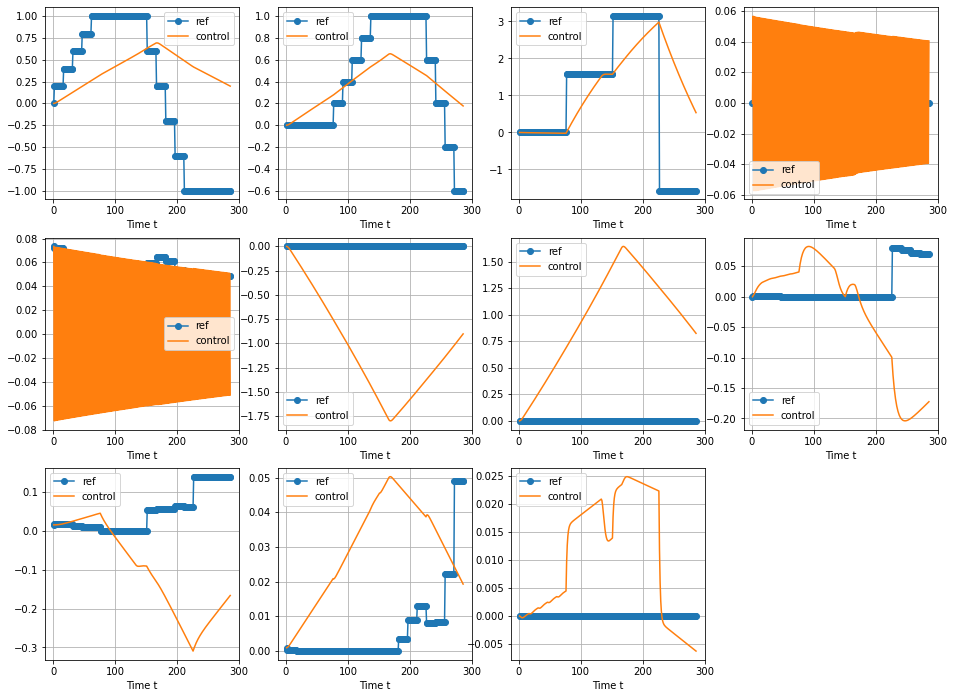

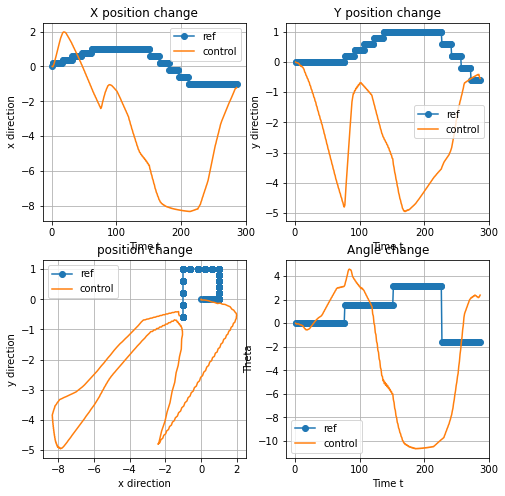

Average time needed per step is 144.97293859649469 ms.
MSE loss: 92.56213941683575
Controled path file: Q-[10. 10. 10.  0.  0.  0.  0.  0.  0.  0.  0.]_R-[1. 1.]_rho-0.01_Nc-15
Total time needed is 43199.669400000064 ms.


In [9]:
# get augmented matrices
model_file = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 1]_batch_10'
Q = 10*np.diag(np.array([1.,1.,1.,0.,0.,0.,0.,0.,0.,0.,0.]))
R = 1*np.diag(np.array([1.,1.]))
rho = 0.01
# Np = 6
Nc = 15
ref = np.load(path+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
u_init = np.array([0.,0.])#1.5*10*np.pi/SimLength,-10*np.pi/SimLength])
t1 = time.perf_counter()
file_name = MPC_control_process(model_file,path_ref,u_init,x_init,Q,R,rho,Nc)
t2 = time.perf_counter()
print("Total time needed is "+str(1000*(t2-t1))+" ms.")

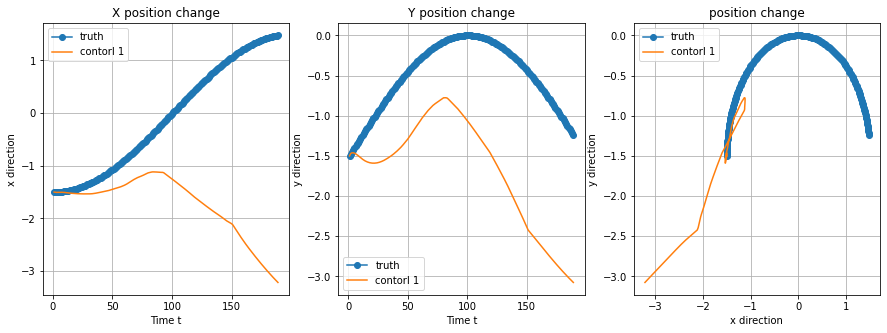

In [10]:
control_files = [file_name]
ref_file = 'SimLenth_200_Ts_0.1'
MPC_result_plot(ref_file,control_files,Nc)

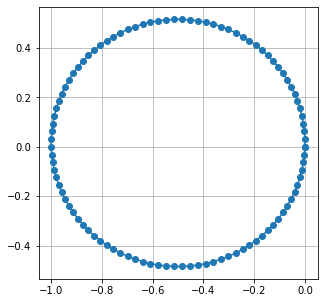

In [7]:
SimLength = 100
X = np.zeros((3,SimLength+1))
X[:,0] = np.array([0,0,np.pi/2])
u = np.array([0.5*20*np.pi/SimLength,20*np.pi/SimLength])

# start simulation as save state
for i in range(SimLength):
    X[:,i+1] = discrete_nonlinear(X[:,i],u,0.1)
plt.figure(figsize=(5,5))
plt.plot(X[0,:],X[1,:],'o-')
plt.grid(True)
plt.show()

In [58]:
(np.ones((1,5))-np.tri(1,5,0))[0]

array([0., 1., 1., 1., 1.])

In [14]:
H = SX(2*np.eye(2))
A = SX(np.ones((2,2)))
g = SX(np.zeros(2))
lba = SX(np.zeros(2))
uba = SX(np.zeros(2))
qp = {}
qp['h'] = H.sparsity()
qp['a'] = A.sparsity()
S = conic('S','osqp',qp)
print(S)
r = S(h=H, g=g,a=A, lba=lba)
x_opt = r['x']
print('x_opt: ', x_opt)

S:(h[2x2],g[2],a[2x2],lba[2],uba[2],lbx[2],ubx[2],x0[2],lam_x0[2],lam_a0[2],q[],p[])->(x[2],cost,lam_a[2],lam_x[2]) OsqpInterface


RuntimeError: D:\bld\casadi_1647512553768\work\casadi\core\function_internal.cpp:1832: 'eval_sx' not defined for OsqpInterface